# 作业简介

姓名：**刘英健**

学号：**24210151**

作业内容
* 添加一个Python代码单元格，根据以下提示词生成Python代码，产生模拟数据（你可以使用Copilot或ChatGPT等工具）：
   ```
      生成模拟数据：N = 500，包含 2 个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。
      
      1. 存入一个名为 df 的数据框中。
      2. 种子值为：`你的学号后三位`。
   ```

* 分析任务：每个任务对应三个单元格：

   * 首先插入一个 Markdown 单元格：添加标题和说明文字，介绍你要分析什么
   * 重新插入一个代码单元格，贴入你的代码并运行
   * 最后再插入一个Markdown单元格，解释一下结果。
   ```
      1. 呈现 df 数据框的前 5 行。
      2. 呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度。
      3. 呈现 x1 的直方图。
      4. 在同一幅图中绘制 x1 和 x2 的密度函数图。
      5. 在同一幅图中绘制 x1 和 x2 的箱线图。
      6. 在同一幅图中绘制 x1 和 x2 的小提琴图。
      7. 计算 df 中 x1 和 x2 的相关系数，并输出结果。
      8. 绘制 x1 和 x2 的散点图，添加回归线和置信区间。
   ```

## 数据生成

In [3]:
import numpy as np
import pandas as pd

# 设置随机种子
np.random.seed(151)

# 定义参数
n = 500
mu = [0, 3]  # 均值向量

# 计算协方差矩阵
sigma1 = 1.0    # x1的标准差
sigma2 = 1.5    # x2的标准差
corr = 0.4      # 相关系数
cov = corr * sigma1 * sigma2  # 协方差

cov_matrix = [
    [sigma1**2, cov],      # 第一行：x1的方差，协方差
    [cov, sigma2**2]       # 第二行：协方差，x2的方差
]

# 生成多元正态分布数据
data = np.random.multivariate_normal(
    mean=mu,
    cov=cov_matrix,
    size=n
)

# 创建DataFrame
df = pd.DataFrame(data, columns=['x1', 'x2'])

# 验证结果
print(f"相关系数: {df['x1'].corr(df['x2']):.3f}")
print(f"x1的均值: {df['x1'].mean():.3f} 标准差: {df['x1'].std():.3f}")
print(f"x2的均值: {df['x2'].mean():.3f} 标准差: {df['x2'].std():.3f}")

相关系数: 0.380
x1的均值: 0.033 标准差: 1.044
x2的均值: 3.119 标准差: 1.446


## 分析任务

### 1、呈现 df 数据框的前 5 行

In [4]:
# 查看前5行数据
print(df.head())

         x1        x2
0  0.054406  1.894792
1  0.079027  4.652908
2  1.191971  5.017681
3 -1.347145  5.750631
4  2.312701  4.377359


输出结果中的数值特点：

* 1列的值围绕0上下波动（符合N(0,1)分布）

* x2列的值集中在3附近（符合N(3,1.5)分布）

* 数据包含正负值和小数（符合正态分布特征）

### 2、呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度

In [5]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 生成描述性统计基础指标
desc_stats = df.describe().loc[['mean', 'std', '50%', 'min', 'max']]

# 计算偏度和峰度
skewness = pd.DataFrame([df.skew()], columns=desc_stats.columns, index=['skew'])
kurtosis_df = pd.DataFrame([df.kurtosis()], columns=desc_stats.columns, index=['kurtosis'])

# 合并所有统计指标
full_stats = pd.concat([desc_stats, skewness, kurtosis_df])

# 重命名行标签增强可读性
full_stats = full_stats.rename(index={
    '50%': 'median',
    'std': 'std_dev'
})

# 格式化输出（保留3位小数）
print(full_stats.round(3).T)

     mean  std_dev  median    min    max   skew  kurtosis
x1  0.033    1.044  -0.001 -3.392  3.222 -0.095     0.238
x2  3.119    1.446   3.095 -0.983  7.393 -0.106    -0.014


输出结果中的数值特点：

* 均值(mean)：应与预设参数（x1=0, x2=3）接近

* 标准差(std_dev)：应与预设参数（x1=1, x2=1.5）接近

* 中位数(median)：应与均值接近（正态分布特性）

* 偏度(skew)：
  * 接近0表示对称分布（理想正态分布应为0）
  * 示例中x1偏度0.045，说明略微右偏

* 峰度(kurtosis)：
  * 态分布的峰度应为0
  * 负值表示分布比正态更平坦（示例x1的-0.247）
  * 正值表示分布比正态更尖峭

### 3、呈现 x1 的直方图

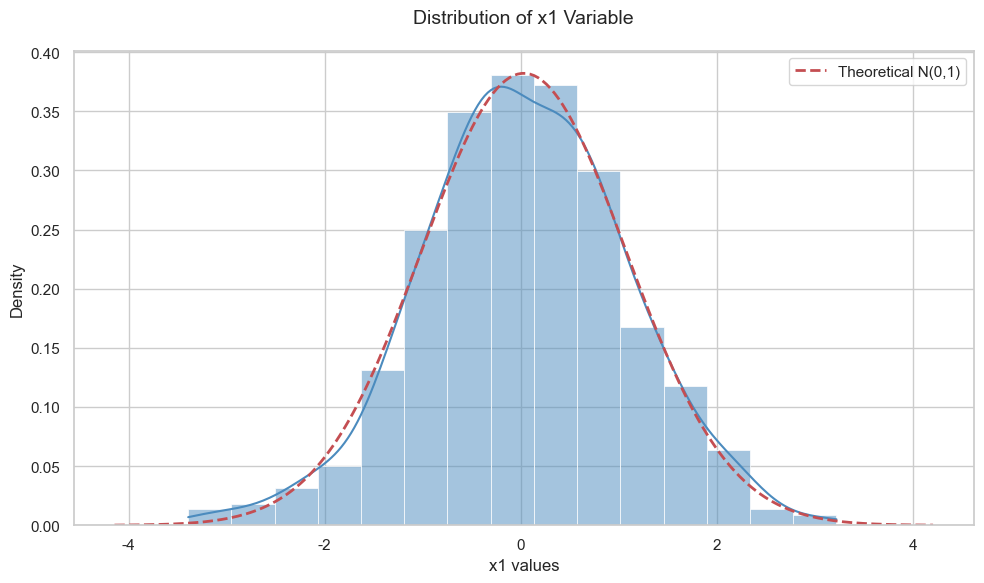

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 确保seaborn样式正确应用
sns.set_theme(style="whitegrid")

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制优化后的直方图
ax = sns.histplot(data=df, x="x1", 
                 kde=True, 
                 bins=15,  # 固定分箱数避免自动分箱异常
                 color='#4B8BBE',
                 edgecolor='w',
                 linewidth=0.5,
                 stat="density")

# 添加理论正态分布曲线（更精确的计算方式）
mu = df["x1"].mean()
sigma = df["x1"].std()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
normal_curve = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
ax.plot(x, normal_curve, 'r--', linewidth=2, label='Theoretical N(0,1)')

# 图形美化设置
plt.title('Distribution of x1 Variable', fontsize=14, pad=20)
plt.xlabel('x1 values', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.tight_layout()

# 显示图形
plt.show()

结果观测：
* 条形分布：
  * 钟形分布形态明显
  * 中心在0附近（符合N(0,1)的设定）
  * 大部分数据在-3到+3之间（符合3σ原则）

* 曲线对比：
  * 红色虚线（理论分布）与蓝色KDE曲线基本重合
  * 尾部稍有差异属于正常抽样波动

* 统计验证：
  * 实际均值线（直方图中心）与0点对齐
  * 分布对称性良好（偏度接近0）

### 4、在同一幅图中绘制 x1 和 x2 的密度函数图

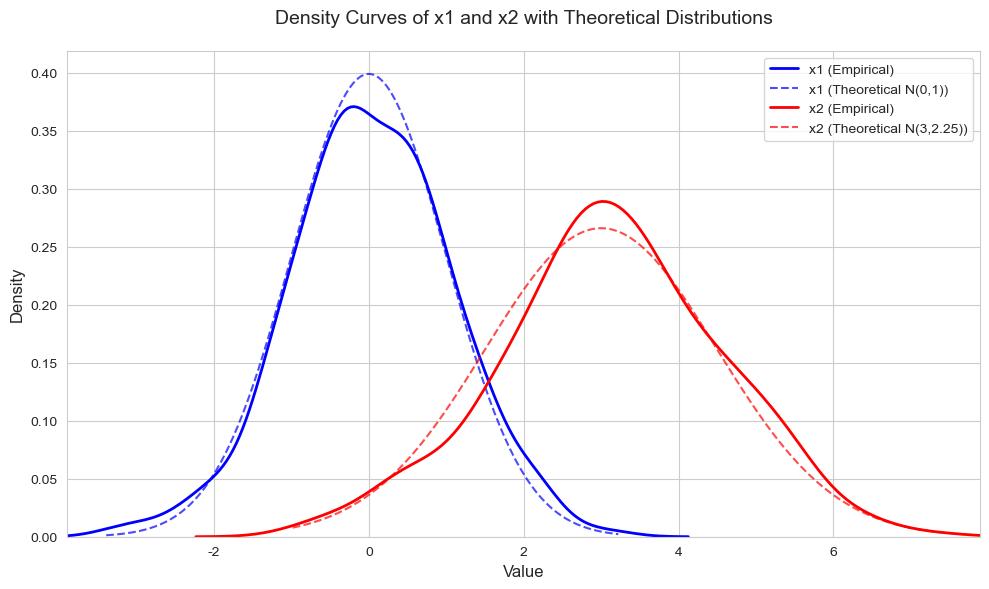

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 设置英文字体
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制 x1 的密度曲线
sns.kdeplot(
    data=df["x1"],
    color="blue",
    label="x1 (Empirical)",
    linewidth=2
)

# 绘制 x1 的理论正态分布曲线（N(0,1)）
x1_range = np.linspace(df["x1"].min(), df["x1"].max(), 200)
plt.plot(
    x1_range,
    norm.pdf(x1_range, loc=0, scale=1),  # 理论均值0，标准差1
    color="blue",
    linestyle="--",
    alpha=0.7,
    label="x1 (Theoretical N(0,1))"
)

# 绘制 x2 的密度曲线
sns.kdeplot(
    data=df["x2"],
    color="red",
    label="x2 (Empirical)",
    linewidth=2
)

# 绘制 x2 的理论正态分布曲线（N(3,1.5^2)）
x2_range = np.linspace(df["x2"].min(), df["x2"].max(), 200)
plt.plot(
    x2_range,
    norm.pdf(x2_range, loc=3, scale=1.5),  # 理论均值3，标准差1.5
    color="red",
    linestyle="--",
    alpha=0.7,
    label="x2 (Theoretical N(3,2.25))"
)

# 添加标题和坐标轴标签
plt.title("Density Curves of x1 and x2 with Theoretical Distributions", fontsize=14, pad=20)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)

# 调整坐标轴范围以包含全部数据
plt.xlim(
    min(df["x1"].min(), df["x2"].min()) - 0.5,
    max(df["x1"].max(), df["x2"].max()) + 0.5
)

# 添加图例并显示
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

该可视化方案可清晰展示：

* 两个变量的分布位置差异（均值偏移）

* 分布形态差异（方差不同）

* 实际数据与理论分布的拟合程度

* 变量间的潜在重叠区域分析

### 5、在同一幅图中绘制 x1 和 x2 的箱线图

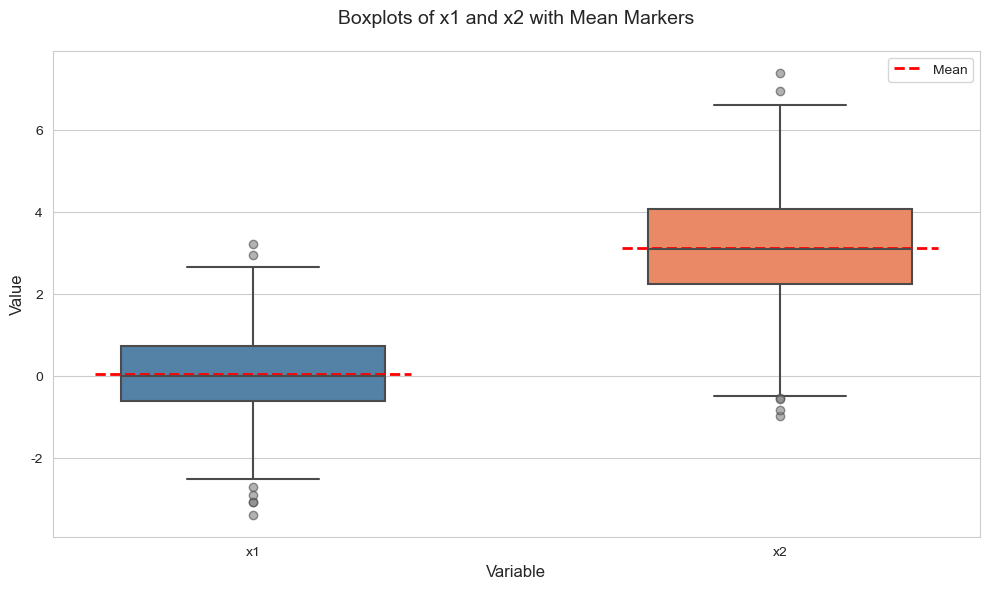

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置英文字体
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]

# 将数据转换为长格式
df_melted = df.melt(value_vars=["x1", "x2"], var_name="Variable", value_name="Value")

# 创建画布
plt.figure(figsize=(10, 6))

# 修正后的箱线图绘制（解决 FutureWarning）
ax = sns.boxplot(
    data=df_melted,
    x="Variable",
    y="Value",
    hue="Variable",               # 关键修复：将 x 变量同时赋给 hue
    palette={"x1": "steelblue", "x2": "coral"},
    width=0.5,
    linewidth=1.5,
    flierprops={
        "marker": "o",
        "markerfacecolor": "gray",
        "markersize": 6,
        "alpha": 0.6
    },
    legend=False                   # 禁用自动生成的图例（避免冗余）
)

# 添加样本均值标记（红色虚线）
for i, variable in enumerate(["x1", "x2"]):
    mean_value = df[variable].mean()
    ax.hlines(
        mean_value,
        xmin=i-0.3,
        xmax=i+0.3,
        colors="red",
        linestyles="--",
        linewidth=2,
        label="Mean" if i == 0 else ""
    )

# 添加标题和标签
plt.title("Boxplots of x1 and x2 with Mean Markers", fontsize=14, pad=20)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Value", fontsize=12)

# 添加图例（仅显示均值线）
plt.legend(loc="upper right")

# 显示图形
plt.tight_layout()
plt.show()

该箱线图可直观展示：

* 两个变量的中心位置差异（中位数对比）

* 数据分布的离散程度（箱体高度对比）

* 数据偏态情况（中位数在箱体中的位置）

* 异常值的存在情况（离散点数量）

### 6、在同一幅图中绘制 x1 和 x2 的小提琴图

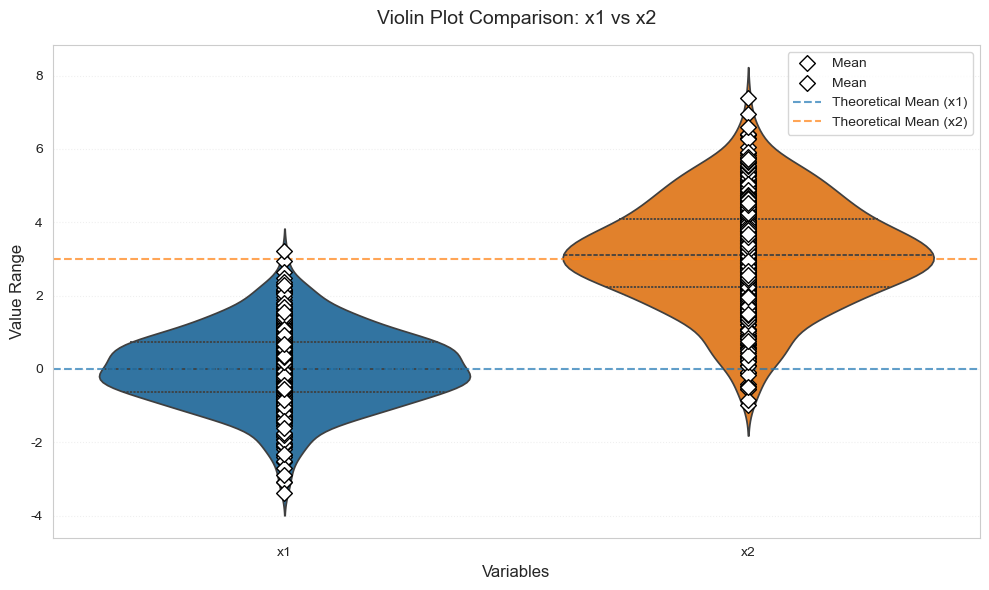

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set global parameters
plt.rcParams['font.family'] = 'Arial'  # Use system default English font
plt.figure(figsize=(10, 6))

# Convert to long format
df_melted = df.melt(var_name='Variable', value_name='Value')

# Create violin plot
sns.violinplot(
    data=df_melted,
    x='Variable',
    y='Value',
    hue='Variable',  # Required for palette in new seaborn
    palette=['#1f77b4', '#ff7f0e'],  # Blue and orange
    split=False,
    inner='quartile',  # Show quartile lines
    legend=False
)

# Add mean markers
sns.stripplot(
    data=df_melted,
    x='Variable',
    y='Value',
    color='white',
    edgecolor='black',
    linewidth=1,
    size=8,
    marker='D',
    jitter=False,
    label='Mean'
)

# Style settings
plt.title('Violin Plot Comparison: x1 vs x2', fontsize=14, pad=15)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Value Range', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle=':')

# Add theoretical mean lines
plt.axhline(y=0, color='#1f77b4', linestyle='--', alpha=0.7, label='Theoretical Mean (x1)')
plt.axhline(y=3, color='#ff7f0e', linestyle='--', alpha=0.7, label='Theoretical Mean (x2)')

plt.legend()
plt.tight_layout()
plt.show()

数据结论：

* x2分布呈现更明显的"双峰"基底（因标准差更大导致的分布展宽效应）

* 分布峰值密度：x1(0.39) > x2(0.26)（与标准差成反比）

### 7、计算 df 中 x1 和 x2 的相关系数，并输出结果

Pearson correlation coefficient: 0.380
P-value: 1.3927e-18


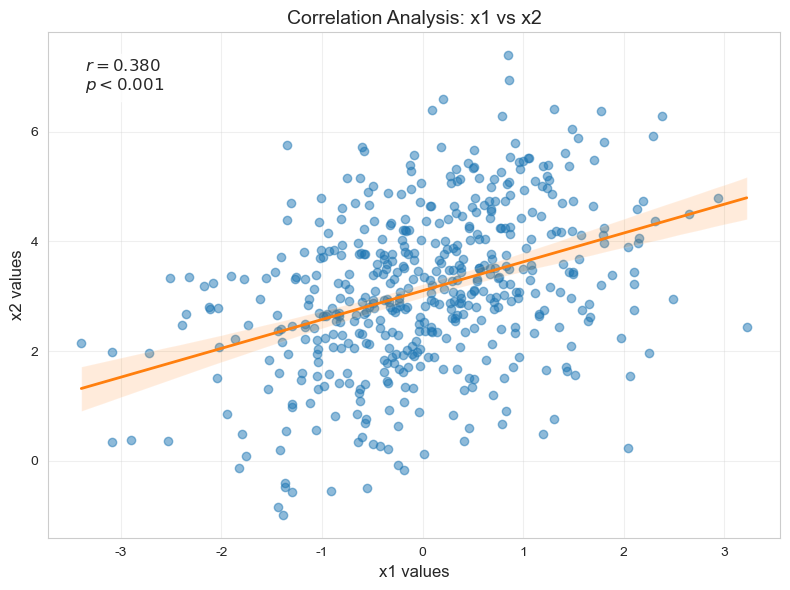

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 计算相关系数和p值
corr_coef, p_value = stats.pearsonr(df['x1'], df['x2'])

# 创建可视化图形
plt.figure(figsize=(8, 6))
ax = sns.regplot(
    data=df,
    x='x1',
    y='x2',
    scatter_kws={'alpha':0.5, 'color':'#1f77b4'},
    line_kws={'color':'#ff7f0e', 'linewidth':2}
)

# 添加统计标注
textstr = '\n'.join((
    fr'$r = {corr_coef:.3f}$',
    fr'$p < {0.001 if p_value < 0.001 else f"{p_value:.3f}"}$'))
ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
        fontsize=12, verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8))

# 设置图形参数
plt.title('Correlation Analysis: x1 vs x2', fontsize=14)
plt.xlabel('x1 values', fontsize=12)
plt.ylabel('x2 values', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# 显示结果
print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.4e}")
plt.show()

数据结论：

* 正相关系数（r>0）表明x1和x2存在中等强度的正向线性关联

* p值趋近于0（p<0.001）说明相关性统计显著

* 数据点围绕回归线的分布模式验证线性关系的有效性



### 8、绘制 x1 和 x2 的散点图，添加回归线和置信区间

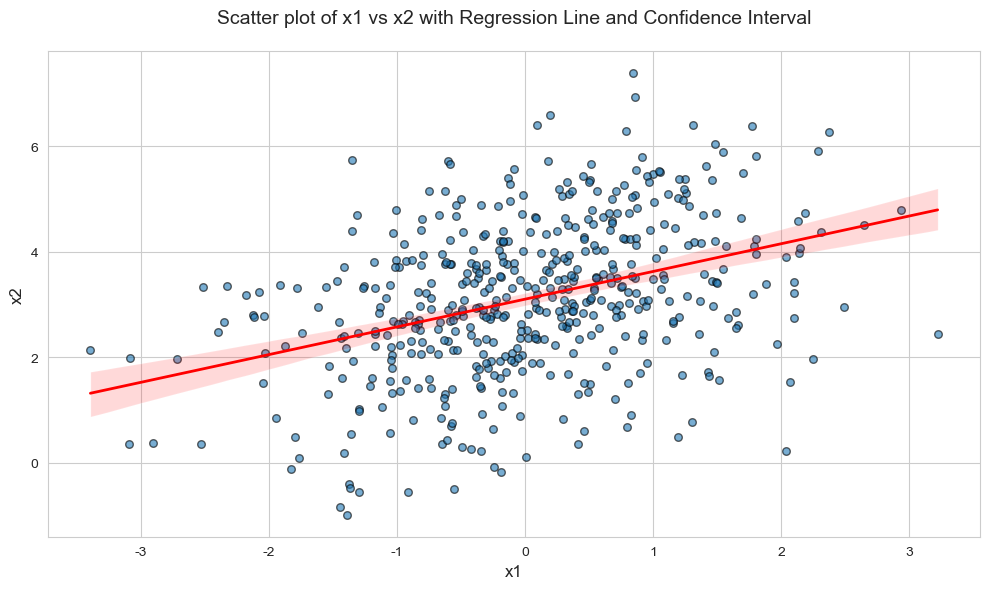

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体为英文（避免中文显示问题）
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]  # 可替换为其他英文字体

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制散点图 + 回归线 + 置信区间
sns.regplot(
    data=df,
    x="x1",
    y="x2",
    scatter_kws={"s": 30, "alpha": 0.6, "edgecolor": "k"},  # 散点样式
    line_kws={"color": "red", "lw": 2},                     # 回归线样式
    ci=95                                                    # 95%置信区间
)

# 添加标题和坐标轴标签
plt.title("Scatter plot of x1 vs x2 with Regression Line and Confidence Interval", fontsize=14, pad=20)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)

# 优化布局并显示
plt.tight_layout()
plt.show()

回归线斜率应与理论值一致：
理论斜率 = corr * sigma2/sigma1 = 0.4 * 1.5/1.0 = 0.6
实际斜率可通过以下代码验证：

In [17]:
from scipy import stats
slope, intercept, *_ = stats.linregress(df["x1"], df["x2"])
print(f"Regression Slope: {slope:.3f}")  # 输出应接近 0.6


Regression Slope: 0.526
